## TASK 1: Perform the following steps to create a clean version of the data


1. Read the CSV file


2. In the content field, do the following:
    - Tokenize and lower-case the text (end result should be an array of tokens where each token is a lexical unit or a punctuation). For example, “He said: ‘Don’t go there!’” => (he, said, :, ‘, don’t, go, there, !, ‘)
    - Remove consecutive spaces and new lines
    - Find and replace URLs with < URL >
    - Find and replace dates with < DATE >
    - Find and replace numbers with < NUM >
    

3. For the metadata fields:
    - Fill all empty fields with a placeholder NULL

    
## Task 2: Perform an exploratory evaluation of the cleaned data and report the results. 

    
The exploration can include (but need not be limited to):
    - counting the number of URLs in the data
    - counting the number of dates in the data
    - counting the number of numeric values in the data
    - determining the 100 more frequent words that appear in the data
    - plotting the frequency of the 10000 most occuring words (do you seen any interesting patterns?)

## Hint:    
You will want to use the following python packages for performing these tasks:
    
    clean-text - for cleaning the text (https://pypi.org/project/clean-text/)
    
    datetime - for date/time conversions (https://docs.python.org/3/library/datetime.html)



In [1]:
import csv
import datetime
from cleantext import clean
import re
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['figure.figsize'] = (20,10)
matplotlib.rcParams.update({'font.size': 18})

In [3]:
# Sample
csv_in = 'news_sample.csv'

In [4]:
# Process and store the stuff            
with open(csv_in, 'r', encoding='utf-8', newline='') as csvfile:
    reader = csv.reader(csvfile)
    headers = next(reader, None)
    data = []
    for row in reader:
        obj = {}
        for header, value in zip(headers, row):
            obj[header] = value
        data.append(obj)    

In [5]:
def clean_content_for_dates_and_set_text_to_lower_case(content):
    pattern1 = r"\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) (?:[\d]{1, 2}), (?:1\d{3}|2\d{3})(?=\D|$)" # feb(ruary) 10, 2010
    pattern2 = r"\b(?:jan|feb|mar|apr|may|jun|jul|aug|sep|oct|nov|dec?). (?:[\d]{1, 2}), (?:1\d{3}|2\d{3})(?=\D|$)" # Feb. 10, 2010
    pattern3 = r"\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) (?:[\d]{1,2}) (?:1\d{3}|2\d{3})(?=\D|$)" # June 12 2016
    pattern4 = r"\b(?:[\d]{1, 2}) (?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) (?:1\d{3}|2\d{3})(?=\D|$)" # 31 Dec 2017
    pattern5 = r"\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) (?:1\d{3}|2\d{3})(?=\D|$)"  # July 2015
    pattern6 = r"\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) (?:[\d]{1,2})(?=\D|$)"  # June 27
    pattern7 = r"\b(?:jan(?:uary)?|feb(?:ruary)?|mar(?:ch)?|apr(?:il)?|may|jun(?:e)?|jul(?:y)?|aug(?:ust)?|sep(?:tember)?|oct(?:ober)?|(nov|dec)(?:ember)?) of (?:1\d{3}|2\d{3})(?=\D|$)" #Aug(ust) of 2014
    pattern8 = r"[\d]{1,2}/[\d]{1,2}/[\d]{4}" # 20/20/2020
    pattern9 = r"[\d]{1,2}-[\d]{1,2}-[\d]{4}" # 20-20-2020
    patterns = [pattern1, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7, pattern8, pattern9]
    clean_text = content.lower()
    for pattern in patterns:
        clean_text = re.sub(pattern, ' <DATE> ', clean_text)
    return clean_text

In [6]:
def clean_content_for_urls_and_numbers(content):
    return clean(content, lower=False,
                 no_line_breaks=True,
                 no_urls=True, 
                 no_numbers=True,
                 replace_with_number='<NUM>',)

In [7]:
def clean_content(content):
    content_cleaned_for_dates = clean_content_for_dates_and_set_text_to_lower_case(content)
    return clean_content_for_urls_and_numbers(content_cleaned_for_dates)

In [8]:
def strip_and_tokenize(text):
    text = re.sub(r'''([!@#$%^&*(),\.?:{}|;\[\]\{\}=´'"])''', r' \1 ', text)
    text = re.sub(r'[\n\t\r]', ' ', text)
    text = re.sub(r'[ ]+', ' ', text)
    return text.split(' ')

In [9]:
token_count = {}
for article in data:
    content = article['content']
    tokenized = strip_and_tokenize(clean_content(content))
    for token in tokenized:
        if token in token_count:
            token_count[token] += 1
        else:
            token_count[token] = 1

In [10]:
token_count

{'sometimes': 17,
 'the': 9493,
 'power': 126,
 'of': 4958,
 'christmas': 16,
 'will': 487,
 'make': 167,
 'you': 1239,
 'do': 320,
 'wild': 5,
 'and': 4702,
 'wonderful': 13,
 'things': 158,
 '.': 9149,
 'not': 737,
 'need': 126,
 'to': 4891,
 'believe': 55,
 'in': 3112,
 'holy': 10,
 'trinity': 1,
 'positive': 30,
 'doing': 42,
 'good': 133,
 'for': 1554,
 'others': 80,
 'simple': 20,
 'act': 69,
 'giving': 17,
 'without': 86,
 'receiving': 11,
 'is': 2317,
 'lost': 24,
 'on': 1163,
 'many': 227,
 'us': 283,
 'these': 349,
 'days': 62,
 ',': 8694,
 'as': 1089,
 'worries': 3,
 'about': 463,
 'money': 117,
 'success': 25,
 'hold': 27,
 'back': 126,
 'from': 709,
 'who': 424,
 'are': 1233,
 'one': 441,
 'congregation': 6,
 'ohio': 7,
 'was': 786,
 'moved': 13,
 'action': 62,
 'by': 839,
 'a': 3389,
 'sermon': 8,
 'given': 75,
 'at': 707,
 'their': 515,
 'church': 14,
 'eve': 5,
 'pastor': 4,
 'grand': 6,
 'lake': 2,
 'united': 80,
 'methodist': 1,
 'celina': 1,
 'gave': 30,
 'an': 520,


In [11]:
print(f'Number of URLs = {token_count["<URL>"]}')
print(f'Number of NUMs = {token_count["<NUM>"]}')
print(f'Number of DATEs = {token_count["<DATE>"]}')

Number of URLs = 243
Number of NUMs = 1870
Number of DATEs = 225


In [12]:
word_freq_sorted = sorted(token_count.items(), key = lambda key: -key[1])
symbols = [char for char in '''!@#$%^&*(),\.?:{}|;\[\]\{\}=´'"'''] + ["<NUM>", "<URL"]
word_freq_sorted = list(filter(lambda word: word[0] not in symbols, word_freq_sorted))
word_freq_sorted[:100]

[('the', 9493),
 ('of', 4958),
 ('to', 4891),
 ('and', 4702),
 ('a', 3389),
 ('in', 3112),
 ('is', 2317),
 ('that', 2296),
 ('s', 1758),
 ('it', 1636),
 ('for', 1554),
 ('you', 1239),
 ('are', 1233),
 ('on', 1163),
 ('with', 1160),
 ('this', 1155),
 ('as', 1089),
 ('i', 1020),
 ('be', 926),
 ('by', 839),
 ('have', 788),
 ('was', 786),
 ('not', 737),
 ('from', 709),
 ('at', 707),
 ('or', 687),
 ('we', 685),
 ('they', 643),
 ('but', 593),
 ('your', 555),
 ('has', 543),
 ('an', 520),
 ('their', 515),
 ('all', 495),
 ('will', 487),
 ('can', 481),
 ('more', 473),
 ('about', 463),
 ('what', 454),
 ('he', 451),
 ('if', 449),
 ('-', 444),
 ('one', 441),
 ('t', 435),
 ('there', 425),
 ('who', 424),
 ('so', 388),
 ('which', 388),
 ('people', 386),
 ('our', 362),
 ('were', 358),
 ('his', 357),
 ('these', 349),
 ('been', 347),
 ('trump', 345),
 ('no', 341),
 ('like', 328),
 ('would', 323),
 ('do', 320),
 ('its', 307),
 ('when', 305),
 ('time', 302),
 ('us', 283),
 ('some', 281),
 ('also', 276),
 (

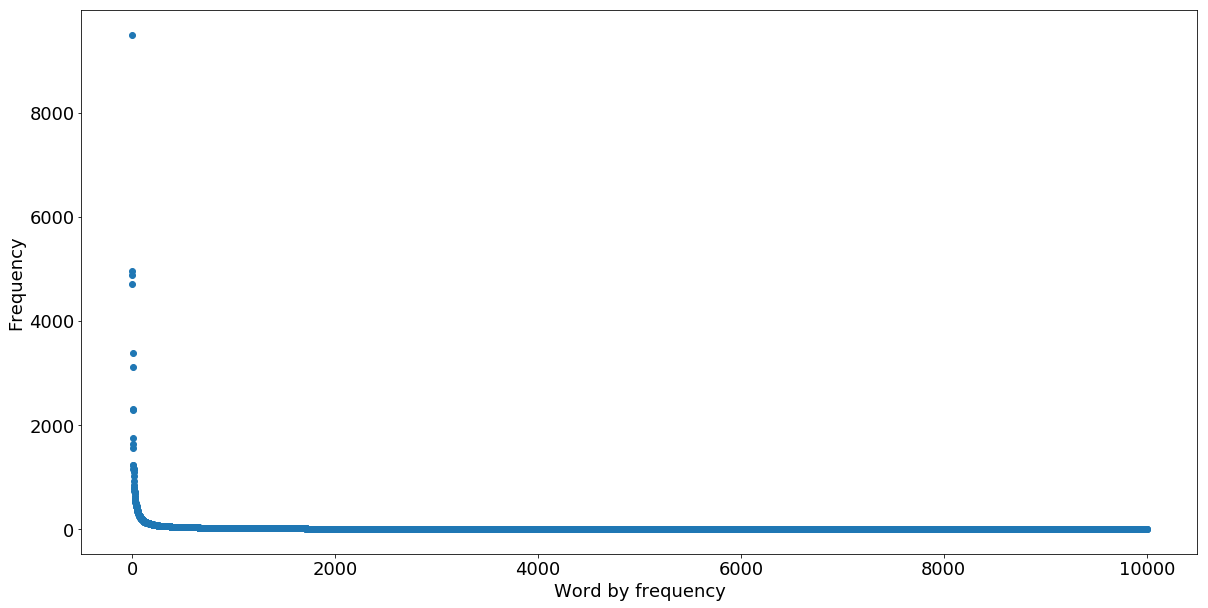

In [13]:
freq_count = [tuple_freq[1] for tuple_freq in word_freq_sorted]
x = range(1, 10001)
y = freq_count[:10000]

plt.scatter(x, y)
plt.xlabel('Word by frequency')
plt.ylabel('Frequency')
plt.show()